## Boosting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

from sklearn import tree
from sklearn.datasets import load_boston
import random
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

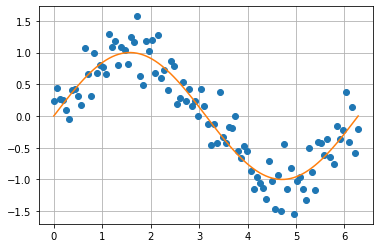

In [4]:
#data generation
n=100
x = np.linspace(0,2*np.pi, n)
trueY = np.sin(x)
obsY = trueY + 0.3*np.random.randn(n)
def pltData():
    plt.plot(x,obsY, marker='o', linestyle="");
    plt.plot(x,trueY, linestyle="-");
    plt.grid();
    
pltData()

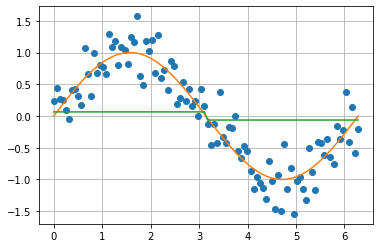

In [5]:
#fit one stump to the data:
d=1
l = 0.1
dt0 = DecisionTreeRegressor(random_state=0, max_depth=d)
dt0.fit(x.reshape(-1, 1), obsY)

preds0 = l*dt0.predict(x.reshape(-1, 1))
pltData()
plt.plot(x,preds0, linestyle="-");

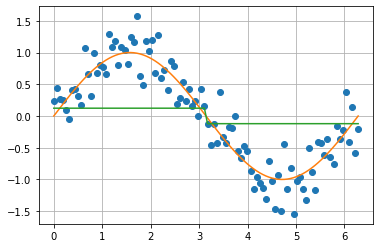

In [6]:
#fit another stump to the residuals:
r = obsY-preds0#residuals
dt1 = DecisionTreeRegressor(random_state=0, max_depth=1)
dt1.fit(x.reshape(-1, 1), r)

preds_r = l*dt1.predict(x.reshape(-1, 1))
BoostedPreds=preds0+preds_r
pltData()
plt.plot(x,BoostedPreds, linestyle="-");

#### Tasks

1. Write a loop to implement boosting
2. Make the above a function
3. Try out various values of learning rate, tree depth and number of iterations
4. Use the sklearn GradientBoostingRegressor module https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

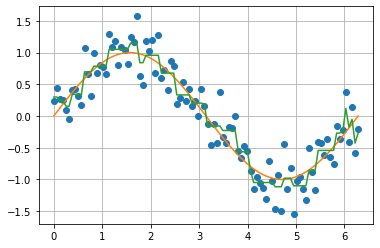

In [55]:
d=1
l = 0.1
n_iter = 1000
rand_stat = 0

r = obsY.copy()
preds_r = 0
BoostedPreds = 0

for i in range(1,n_iter):
    dt = DecisionTreeRegressor(random_state=rand_stat, max_depth=d)
    dt.fit(x.reshape(-1, 1), r)
    
    preds_r = l*dt.predict(x.reshape(-1, 1))
    r -= preds_r#residuals
    BoostedPreds+=preds_r

pltData()
plt.plot(x,BoostedPreds, linestyle="-");

In [56]:
def boost_plot(x, y, d=1, l=0.1, n_iter=100, rand_stat=0):

    r = y.copy()
    preds_r = 0
    BoostedPreds = 0

    for i in range(1,n_iter):
        dt = DecisionTreeRegressor(random_state=rand_stat, max_depth=d)
        dt.fit(x.reshape(-1, 1), r)

        preds_r = l*dt.predict(x.reshape(-1, 1))
        r -= preds_r#residuals
        BoostedPreds+=preds_r

    pltData()
    plt.plot(x,BoostedPreds, linestyle="-");

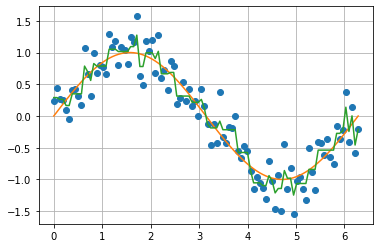

In [60]:
boost_plot(x,obsY, d=2, l=0.2, n_iter=50)

**Try out some values**

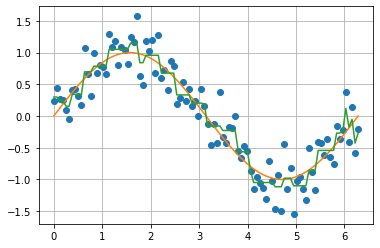

In [61]:
d=1
l = 0.1
n_iter = 1000

boost_plot(x, obsY, d=d, l=l, n_iter=n_iter)

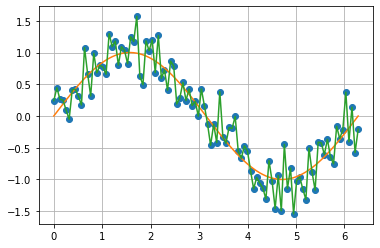

In [62]:
d=3
l = 0.1
n_iter = 1000

boost_plot(x, obsY, d=d, l=l, n_iter=n_iter)

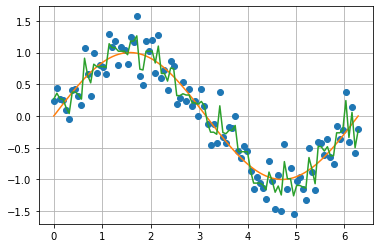

In [63]:
d=3
l = 0.1
n_iter = 100

boost_plot(x, obsY, d=d, l=l, n_iter=n_iter)

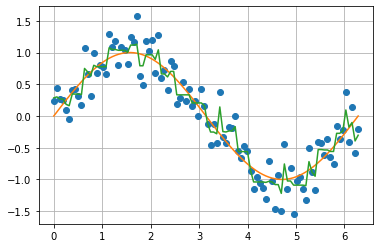

In [66]:
d=3
l = 0.01
n_iter = 500

boost_plot(x, obsY, d=d, l=l, n_iter=n_iter)

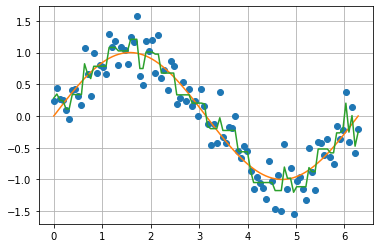

In [68]:
d=1
l = 0.1
n_iter = 3000

boost_plot(x, obsY, d=d, l=l, n_iter=n_iter)

**Sklearn**

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(max_depth=d, learning_rate=l, n_estimators=n_iter ,random_state=0)
reg.fit(x.reshape(-1, 1), obsY)

GradientBoostingRegressor(max_depth=1, n_estimators=3000, random_state=0)

**Write a loop to implement boosting**

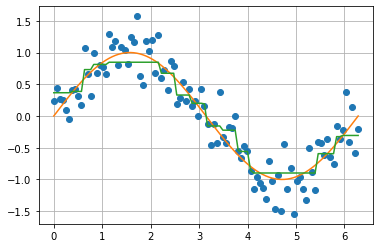

In [14]:
n_iter = 100
d=1
l = 0.1
rand_state = 0

#for first iteration
r = obsY.copy()
boosted_preds=0
preds_r =0

for i in range(1, n_iter):
    dt = DecisionTreeRegressor(random_state=rand_state, max_depth=d)
    dt.fit(x.reshape(-1, 1), r) 
    preds_r =l*dt.predict(x.reshape(-1, 1))
    boosted_preds+=preds_r
    r -= preds_r
        
        
pltData()
plt.plot(x, boosted_preds, linestyle="-");

**Make the above a function**

In [16]:
def boost(x,y,n_iter=100,d=1,l=0.1,rand_state=0):

    r = y.copy()
    boosted_preds=0
    preds_r =0

    for i in range(1, n_iter):
        dt = DecisionTreeRegressor(random_state=rand_state, max_depth=d)
        dt.fit(x.reshape(-1, 1), r) 
        preds_r =l*dt.predict(x.reshape(-1, 1))
        boosted_preds+=preds_r
        r -= preds_r


    pltData()
    plt.plot(x, boosted_preds, linestyle="-");

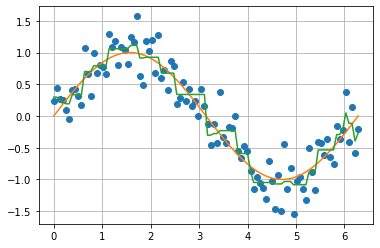

In [40]:
boost(x, obsY, n_iter=100, d=1, l=0.5)

**Try out various variations**

In [41]:
from sklearn.model_selection import ParameterGrid
param_grid = {'n_iter': [10,50,100,200,500], 'd':[1,2,3,4,5], 'l':np.arange(0.1,1.1,0.1)}

grid = ParameterGrid(param_grid)


KeyboardInterrupt: 

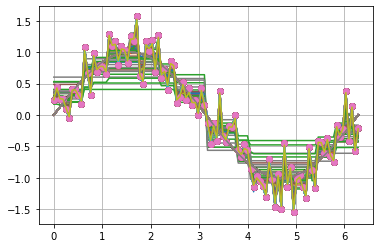

In [43]:
for params in grid:
    boost(x, obsY, n_iter=params["n_iter"], d=params["d"], l=params["l"])

# Interpretable ML 

- **Marginal effect**: Only look at one variable at a time (**NOT controlling for the others**) -> getting effects from other x into x_1 (giving x_1 credit for it) 
- **Partial effect**: Only look at one variable at a time (**controlling for all the other variables**)

Problem: Black box models -> no coefficients for partial analysis, visualization!

## Partial Dependence Plot (PDP)